In [1]:
# GAN(Generative Adversarial Network)
# 적대적 생성 모델
# 생성 모델 : 데이터의 형태를 만들어 내는 모델, 어떤 분포 혹은 분산 자체를 만들어내는 모델
# 적대적 : 지폐위조범(Generator)과 경찰(Discriminator)
# Generator: 새로운 데이터의 형태를 만들어 내는 모델, 판독 모델을 틀리도록 하는 역할(적대적 모델), 진짜 같은 가짜를 생성 해내는 모델
# Discriminator: 데이터 판독 모델(Real, Fake 판독)

In [2]:
import torch
import random
# real 이미지 생성 함수
def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)])
    return real_data

In [3]:
# random 이미지 생성 함수
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [5]:
import torch.nn as nn
import pandas as pd

# 판별 모형
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
        self.loss_function = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print("counter = ", self.counter)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

In [6]:
D = Discriminator()
for i in range(10000):
    # real image
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # fake image
    D.train(generate_random(4), torch.FloatTensor([0.0]))

counter =  10000
counter =  20000


In [7]:
print( D.forward( generate_real() ).item() )
print( D.forward( generate_random(4) ).item() )

0.807684600353241
0.43110573291778564


In [8]:
# 생성모형
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
          nn.Linear(1, 3),
          nn.Sigmoid(),
          nn.Linear(3, 4),
          nn.Sigmoid())
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

In [9]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.6740, 0.4254, 0.4087, 0.6188], grad_fn=<SigmoidBackward0>)

In [10]:
D = Discriminator()
G = Generator()
image_list = []
for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # 판별모형 학습(false)
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    # 생성모형 학습
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    if i % 1000 == 0:
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())

counter =  10000
counter =  20000


In [11]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9550, 0.0316, 0.9014, 0.0304], grad_fn=<SigmoidBackward0>)

In [13]:
# 생성된 패턴
image_list

[array([0.35010597, 0.58820623, 0.73366094, 0.7345501 ], dtype=float32),
 array([0.3504104 , 0.56685024, 0.72523355, 0.72486156], dtype=float32),
 array([0.37738258, 0.4989261 , 0.7179786 , 0.68643296], dtype=float32),
 array([0.47931612, 0.3494259 , 0.7199904 , 0.5543163 ], dtype=float32),
 array([0.6818815 , 0.18343076, 0.7371567 , 0.27876014], dtype=float32),
 array([0.8283324 , 0.10031763, 0.7640242 , 0.12380664], dtype=float32),
 array([0.892406  , 0.06586275, 0.7983696 , 0.07231449], dtype=float32),
 array([0.922613  , 0.04934721, 0.8335795 , 0.05098474], dtype=float32),
 array([0.9389183 , 0.04034847, 0.86311394, 0.04027272], dtype=float32),
 array([0.94870704, 0.03497957, 0.8853715 , 0.0341843 ], dtype=float32)]

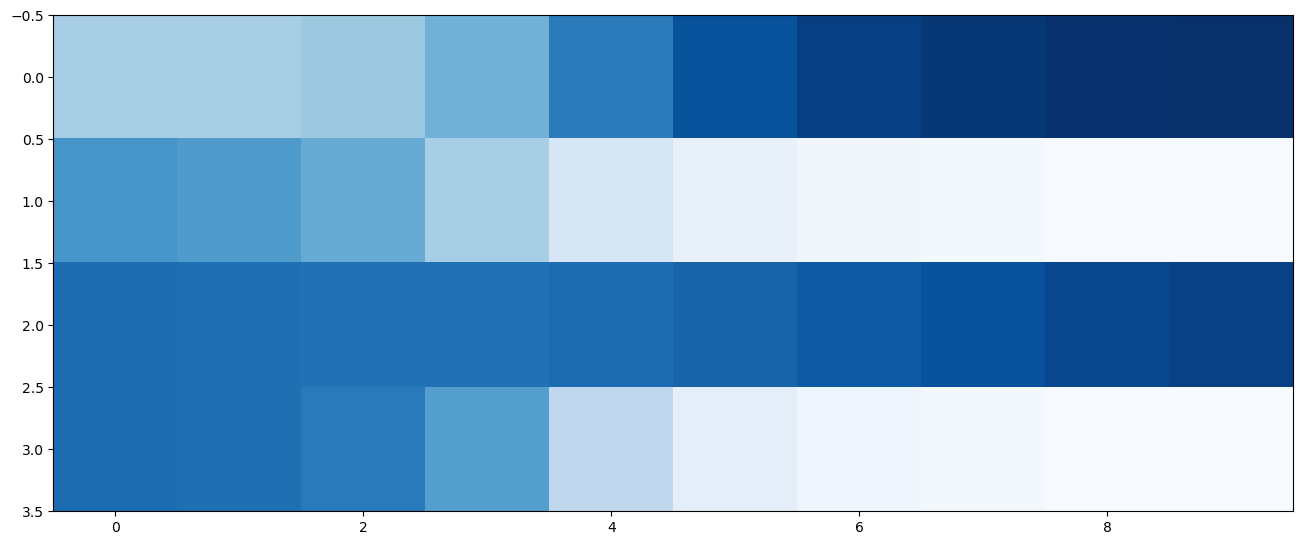

In [12]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np

plt.figure(figsize = (16,8))
plt.imshow(np.array(image_list).T, interpolation='none', cmap='Blues')
plt.show()